## 2a. Training Models (XGBoost)

In [1]:
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("../preprocessed/clean_survey.csv", index_col=False)
df

,q_000,q_001,q_003,q_004,q_005,q_006,q_007,q_008,q_009,q_011,...,q_130_NSW,q_130_NT,q_130_QLD,q_130_SA,q_130_TAS,q_130_VIC,q_130_WA,invol_score,q_031_adjusted,involvement_level
0,1.00,2,1,1,1,1,1,1,1,5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,Low
1,0.89,2,0,0,0,1,0,1,1,5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,Low
2,0.86,1,1,1,0,0,0,1,0,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1,Medium
3,0.85,2,0,1,0,1,0,0,0,3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,1,Medium
4,0.71,1,0,1,0,1,0,1,0,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3,1,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,0.62,1,1,0,1,0,0,0,0,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1,Low
871,1.00,0,1,1,1,1,1,1,1,5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,Low
872,1.00,2,1,1,1,1,1,1,1,5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,Low
873,1.00,3,1,1,1,1,1,1,1,5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1,Low


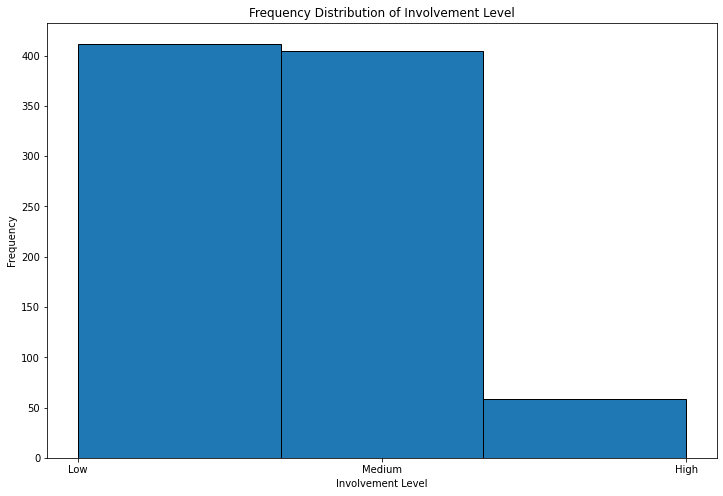

In [3]:
plt.figure(figsize=(12, 8))
df["involvement_level"].hist(bins=3, edgecolor='black')
plt.title('Frequency Distribution of Involvement Level')
plt.xlabel('Involvement Level')
plt.ylabel('Frequency')
plt.grid(False)  # Optionally turn off the grid if preferred
plt.show()

We can clearly see the imbalanced label distribution, where 'High' involvement has very few data instances. Thus, we oversample the dataset so that the labels are more balanced

In [4]:
from sklearn.model_selection import train_test_split

# split to indenpendent and dependent variables
# drop all variables computing the labels
X = df.drop(['q_031_adjusted', 'invol_score', 'q_031', 'involvement_level'] + [f'q_0{i}' for i in range(45, 55)], axis=1)
y = df["involvement_level"]


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encoding the labels into integers
label_encoder = LabelEncoder()

y_encoded = label_encoder.fit_transform(y)

# Printing the mapping from encoded labels to original class labels
label_mapping = {index: label for index, label in enumerate(label_encoder.classes_)}
print(label_mapping)

# Split the dataset into training and testing sets
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, stratify=y_encoded, random_state=42)

{0: 'High', 1: 'Low', 2: 'Medium'}


In [6]:
print("Shape of X_train:", X_train.shape)  # Should be (num_samples, num_features)
print("Shape of y_encoded:", y_train_encoded.shape)  # Should be (num_samples,)

Shape of X_train: (656, 91)
Shape of y_encoded: (656,)


In [7]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
# Calculate class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_encoded), y=y_train_encoded)
sample_weights = [class_weights[label] for label in y_train_encoded]
sample_weights

[0.7076591154261057,
 0.7076591154261057,
 0.7076591154261057,
 0.7192982456140351,
 0.7192982456140351,
 0.7192982456140351,
 0.7076591154261057,
 0.7192982456140351,
 0.7192982456140351,
 0.7192982456140351,
 0.7192982456140351,
 0.7076591154261057,
 0.7076591154261057,
 0.7076591154261057,
 0.7192982456140351,
 0.7192982456140351,
 0.7192982456140351,
 0.7192982456140351,
 0.7076591154261057,
 0.7076591154261057,
 0.7192982456140351,
 0.7076591154261057,
 0.7192982456140351,
 0.7076591154261057,
 0.7192982456140351,
 0.7192982456140351,
 0.7192982456140351,
 0.7192982456140351,
 5.0852713178294575,
 5.0852713178294575,
 0.7192982456140351,
 0.7192982456140351,
 0.7192982456140351,
 0.7192982456140351,
 0.7076591154261057,
 0.7192982456140351,
 0.7192982456140351,
 0.7192982456140351,
 0.7076591154261057,
 0.7076591154261057,
 0.7076591154261057,
 0.7192982456140351,
 0.7192982456140351,
 0.7192982456140351,
 0.7076591154261057,
 0.7076591154261057,
 0.7076591154261057,
 0.7076591154

### 2.1 XGBoost Classifier Hyperparameter Tuning

In [8]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Define the parameter grid (explicitly, as GridSearchCV requires)
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],  # Explicit values
    'subsample': [0.6, 0.8, 1.0],  # Explicit values
    'max_depth': [3, 4, 6],
    'colsample_bytree': [0.5, 0.7],  # Explicit values
    'min_child_weight': [1, 3, 5]  # Example ranges for illustration
}

# Setup GridSearchCV
grid_search = GridSearchCV(model, param_grid=param_grid, scoring='f1_weighted', n_jobs=-1, cv=5, verbose=3)

# Fit GridSearchCV
grid_search.fit(X_train, y_train_encoded, sample_weight=sample_weights)


Fitting 5 folds for each of 486 candidates, totalling 2430 fits
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50, subsample=0.8;, score=0.629 total time=   0.4s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50, subsample=0.6;, score=0.634 total time=   0.4s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50, subsample=0.6;, score=0.646 total time=   0.4s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50, subsample=0.8;, score=0.599 total time=   0.4s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50, subsample=0.6;, score=0.627 total time=   0.5s[CV 3/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50, subsample=0.8;, score=0.676 total time=   0.3s

[CV 1/5] END colsample_b

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 0.7],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 6], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='f1_weighted', verbose=3)

In [9]:
# Best parameters found
print("Best parameters found: ", grid_search.best_params_)
best_params_grid_xg = grid_search.best_params_
# Best F1 weighted score
print("Best F1 weighted score: ", grid_search.best_score_)

Best parameters found:  {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 50, 'subsample': 0.8}
Best F1 weighted score:  0.6952349151660775


### Model Evaluation

In [10]:
import pickle
# X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, random_state=42)
# Imbalanced training set ready for oversampling
#X_train_imb, X_test, y_train_encoded_imb, y_test_encoded = train_test_split(X, y_encoded, random_state=42)
#smote = SMOTE(random_state=42)
#X_train, y_train_encoded = smote.fit_resample(X_train_imb, y_train_encoded_imb)

# best model
model = grid_search.best_estimator_
print(model.get_params())
model.fit(X_train, y_train_encoded, sample_weight=sample_weights)

# save the fitted model
with open('../models/xgboost_1.pkl', 'wb') as file:
    pickle.dump(model, file)

{'objective': 'multi:softprob', 'use_label_encoder': False, 'base_score': 0.5, 'booster': 'gbtree', 'callbacks': None, 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 0.7, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'mlogloss', 'gamma': 0, 'gpu_id': -1, 'grow_policy': 'depthwise', 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 0.1, 'max_bin': 256, 'max_cat_to_onehot': 4, 'max_delta_step': 0, 'max_depth': 4, 'max_leaves': 0, 'min_child_weight': 3, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 50, 'n_jobs': 0, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'sampling_method': 'uniform', 'scale_pos_weight': None, 'subsample': 0.8, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}


In [11]:
from sklearn.metrics import hamming_loss, accuracy_score, f1_score, roc_auc_score

# Evaluating the model
y_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)


# Calculating various metrics
print("Hamming Loss:", hamming_loss(y_test_encoded, y_pred))
print("Subset Accuracy:", accuracy_score(y_test_encoded, y_pred))

# Micro-average
print("F1 Score (Micro):", f1_score(y_test_encoded, y_pred, average='micro'))
# Macro-average
print("F1 Score (Macro):", f1_score(y_test_encoded, y_pred, average='macro'))
# Weighted-average
print("F1 Score (Weighted):", f1_score(y_test_encoded, y_pred, average='weighted'))

# ROC-AUC
# Note: roc_auc_score expects a shape of (n_samples,) for binary problems and
# (n_samples, n_classes) for multi-class/multi-label with one-hot encoding.
# ROC-AUC calculation needs probabilistic predictions `y_proba`
# use macro since class labels are imbalanced
roc_auc = roc_auc_score(y_test_encoded, y_proba, average='macro', multi_class='ovr')
print("ROC-AUC (Macro):", roc_auc)



Hamming Loss: 0.319634703196347
Subset Accuracy: 0.680365296803653
F1 Score (Micro): 0.680365296803653
F1 Score (Macro): 0.6282502955715838
F1 Score (Weighted): 0.6790551296302999
ROC-AUC (Macro): 0.8183944198121308


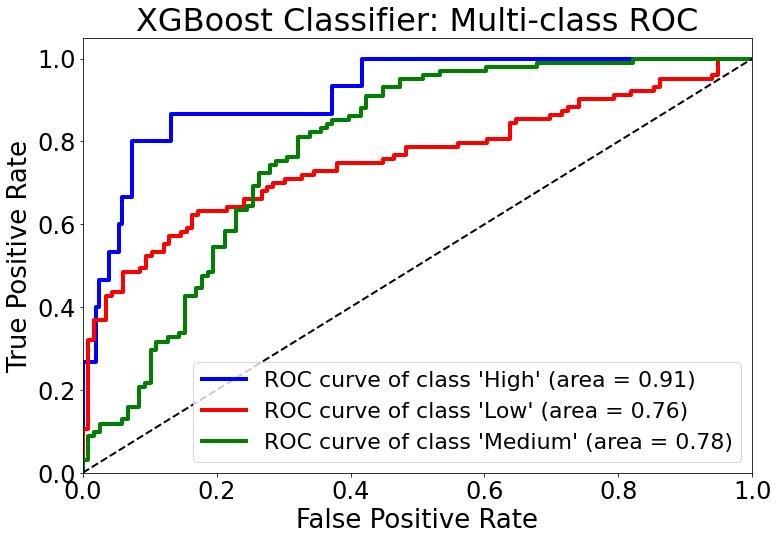

In [20]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import numpy as np

# Binarize the output labels for multi-class ROC curve plotting
y_test_binarized = label_binarize(y_test_encoded, classes=np.unique(y_train_encoded))
n_classes = y_test_binarized.shape[1]
# Colors for different classes
colors = cycle(['blue', 'red', 'green'])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
y_proba = model.predict_proba(X_test)
all_classes = model.classes_
for j in range(3):
    fpr[j], tpr[j], _ = roc_curve(y_test_binarized[:, j], y_proba[:, j])
    roc_auc[j] = auc(fpr[j], tpr[j])

# Plot ROC curve for each class
plt.figure(figsize=(12, 8))
for j, color in zip(range(n_classes), colors):
    plt.plot(fpr[j], tpr[j], color=color, lw=4,
                label=f"ROC curve of class '{label_mapping[j]}' (area = {roc_auc[j]:0.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=26)
plt.ylabel('True Positive Rate', fontsize=26)
plt.title(f'XGBoost Classifier: Multi-class ROC', fontsize=32)
plt.legend(loc="lower right", fontsize=22)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.show()

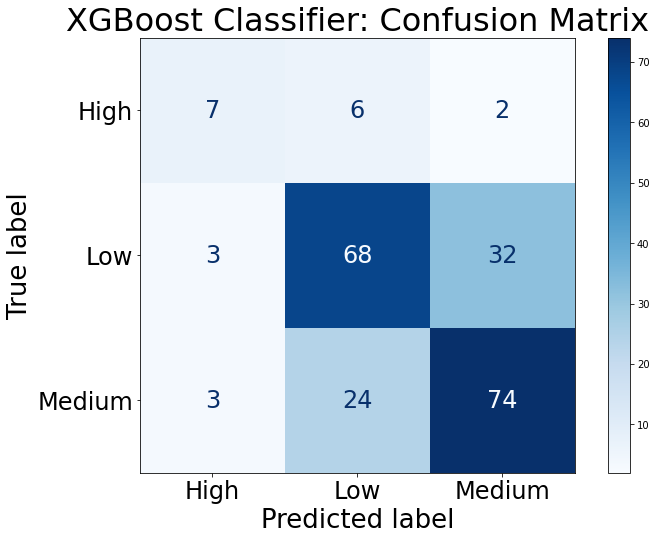

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test_encoded, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
# Create a new figure or adjust the current figure size here
fig, ax = plt.subplots(figsize=(12, 8))
# Increase text font size within the matrix
disp.plot(ax=ax, cmap=plt.cm.Blues)  # Plot on the specified axes to control the size

# Now adjust the fontsize using ax properties
ax.set_title(f'XGBoost Classifier: Confusion Matrix', fontsize=32)  # Adjust title fontsize
ax.set_xlabel('Predicted label', fontsize=26)  # Adjust x-axis label fontsize
ax.set_ylabel('True label', fontsize=26)  # Adjust y-axis label fontsize
ax.tick_params(axis='both', which='major', labelsize=24)  # Adjust tick fontsize for both axes

# Adjusting the font size of the annotations inside the confusion matrix
for text_arr in disp.text_:
    for text in text_arr:
        text.set_fontsize(24)  # Set font size for each element
    
plt.show()